# Project: Titanic- Machine learning from disaster 

## Tables of content:
*    [1. Introduction](#introduction)
*    [2. Loading data](#loading-data)         
*    [3. Exploratory Data Analysis(EDA)](#eda)
*    [4. Feature Engineering & Data Wrangling](#fe&dw)
*    [5. Model_training](#model-training)

## Introduction<a class="anchor" id="introduction"></a>

The sinking of the Titanic is one of the most infamous shipwrecks in history.On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew. 

Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew. Although there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others, such as women, children, and the upper-class. 

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

## 2. Loading data<a class="anchor" id="loading-data"></a>

In [1]:
#import lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_csv("./data/train.csv")
test_df = pd.read_csv("./data/test.csv")

In [3]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
test_df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<h5> notes:
    <ul>
        <li> sibsp:	# of siblings / spouses aboard the Titanic	</li>
        <li>parch:	# of parents / children aboard the Titanic</li>
        <li>ticket: Ticket number</li>
   </ul>
    

In [5]:
#preview data
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<h5> PassengerId
    <br>
    <br>The first column should be PassengerId. The ID for a passenger is just a number to identify this passanger in the dataset, thus this information is not a part of the information that we are seeking for. We can drop this comlumn or make it in the index of the dataset. 

In [6]:
train_df.set_index(train_df.PassengerId, inplace = True)

In [7]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,,
1,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
train_df.drop('PassengerId', axis = 1, inplace =True)

In [9]:
train_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [10]:
test_df = pd.read_csv("./data/test.csv", index_col = 'PassengerId')

In [11]:
test_df.tail()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


# 2. 1. Feature classificatiton: categorical and numerical

Categorical: nominal, ordinal, ratio, interval \
Numerical : discrete, continuous, timeseries


In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [13]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


-  Categorical: survived, sex, Embarked, Pclass(ordinal), SibSp, Parch
        Embarked: port of embarktion - C= Cherbourg, Q= Queenstown, S = southampton
-  Numerical (continous): Age; (discrete): Fare
-  Mix type data: Ticket, Cabin
-  Contain Error/ Typo: Name
- Blank or null: cabin > Age > Embarked
- Various data type: String, Int, Float

#### According to the data dictionary, we know that if a passenger is marked as 1 ,  clearly number 1 or 0 is a flag for the person's survivorship. Yet the data of this column is marked as int64, which is a numerical type, we need to change it with the following command

In [14]:
train_df["Survived"] = train_df["Survived"].astype("category")

In [15]:
train_df["Survived"].dtype

CategoricalDtype(categories=[0, 1], ordered=False)

##### Below steps is converted all the wrong type data into the correct data type

In [16]:
converted_features = [ "Pclass","Sex","SibSp","Parch","Embarked"]
def conver_cat(df, features):
    for feature in features:
        df[feature] = df[feature].astype("category")

conver_cat(train_df, converted_features)
conver_cat(test_df, converted_features)

In [17]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Name      891 non-null    object  
 3   Sex       891 non-null    category
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    category
 6   Parch     891 non-null    category
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    object  
 10  Embarked  889 non-null    category
dtypes: category(6), float64(2), object(3)
memory usage: 48.1+ KB


#### 2.1.1. Distribution of numerical feature values accross the sample

In [18]:
train_df.describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


### 2.1.2. Distribution of categorical features

In [19]:
train_df.describe(include=['category'])

,Survived,Pclass,Sex,SibSp,Parch,Embarked
count,891,891,891,891,891,889
unique,2,3,2,7,7,3
top,0,3,male,0,0,S
freq,549,491,577,608,678,644


## 3. Exploratory Data Analysis(EDA) <a class="anchor" id="eda"></a>

### 3.1 correlating categorical features
- Categorical: survived, sex, Embarked, Pclass(ordinal), SibSp, Parch
### Target variable: Survived

In [20]:
train_df['Survived'].value_counts().to_frame()

,Survived
0,549
1,342


In [21]:
train_df['Survived'].value_counts(normalize=True).to_frame()

,Survived
0,0.616162
1,0.383838


Only 38% people survived from the disaster. So the training suffers from data imbalance but it is not severe which is why I will not consider techniques like sampling to tackle the imbalance
### `Sex`

In [22]:
train_df['Sex'].value_counts(normalize = True).to_frame()

,Sex
male,0.647587
female,0.352413


<AxesSubplot:xlabel='Sex', ylabel='count'>

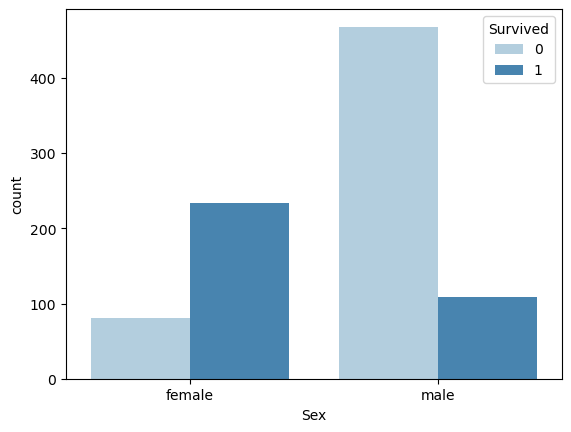

In [23]:
sns.countplot(data = train_df, x='Sex', hue='Survived',palette='Blues')

- Remaining cactegorical feature columns

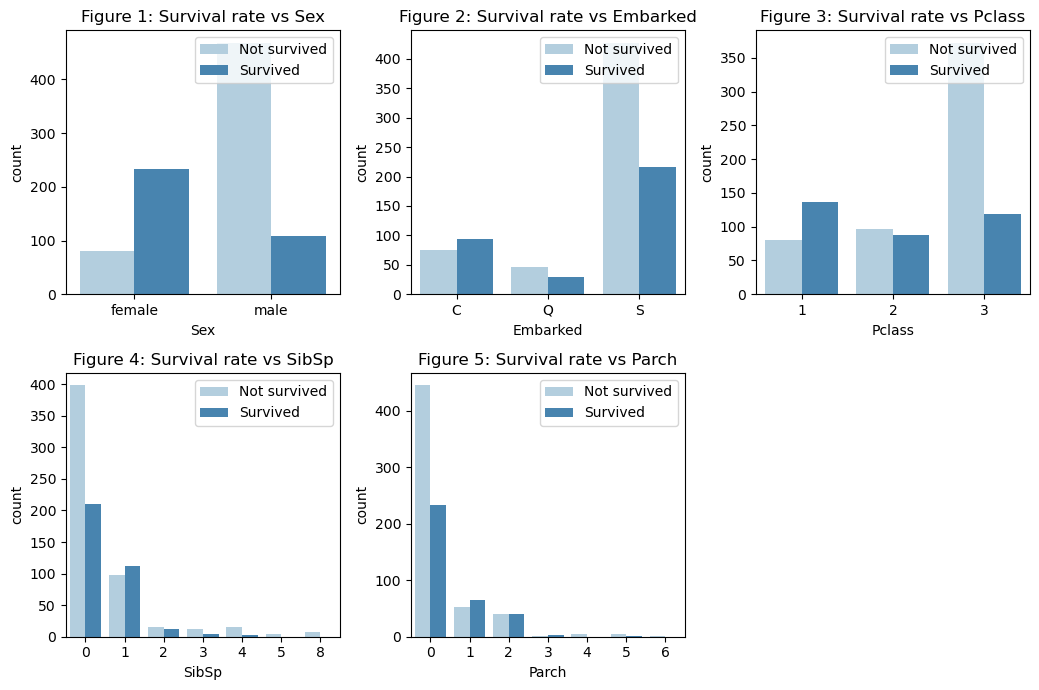

In [24]:
cols = [ "Sex","Embarked","Pclass","SibSp","Parch"]

n_rows = 2
n_cols = 3

fig, ax = plt.subplots(n_rows, n_cols, figsize=(n_cols*3.5, n_rows*3.5))

for r in range(0, n_rows):
    for c in range(0, n_cols):
        i = r*n_cols + c #index to loop through list "cols"
        if i < len(cols):
            ax_i = ax[r,c]
            sns.countplot(data = train_df, x = cols[i], hue="Survived", palette ='Blues', ax=ax_i)
            ax_i.set_title(f"Figure {i+1}: Survival rate vs {cols[i]}")
            ax_i.legend(title='', loc='upper right', labels=['Not survived','Survived'])
ax.flat[-1].set_visible(False) # Remove the last subplot
plt.tight_layout()
plt.show()

### Observation 

* **Survival rate**
    - Fig 1: Survival rate of female is higher than Male's
    - Fig 2: Most people embarked on Southampton, and this place also has the highest people not survived
    - Fig 3: People from the 1st class has the higher survival rate
    - Fig 4: People who was going with 0 `SibSp` are mostly not survive. The number of passenger with 1 or 2 family members has a higher survival rate
    - Fig 5 Same as Sibsp, people with 1 or 2 `Parch` has a better chance of survival

### 3.2 EDA for Numerical Features:
-     Numerical (continuous): Age, Fare

`Age`

<AxesSubplot:xlabel='Age', ylabel='Count'>

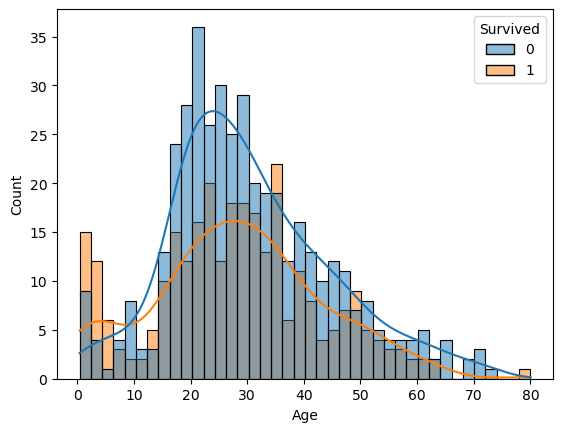

In [25]:
sns.histplot(data= train_df, x="Age",hue="Survived", bins = 40, kde = True)

- Majority passengers was 18-40 years old
- Children, compared with other ages,had more chance to survive 

`Fare`

In [26]:
train_df["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

<AxesSubplot:xlabel='Fare', ylabel='Count'>

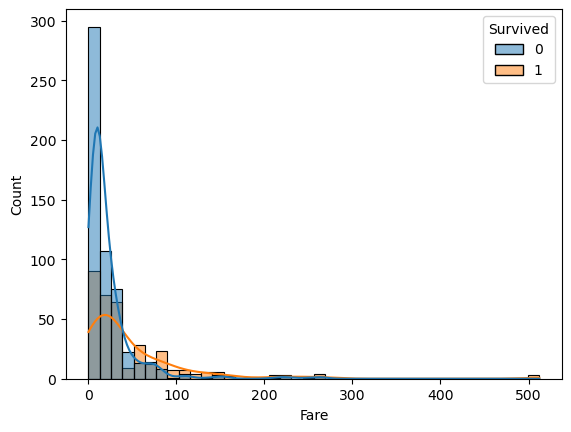

In [27]:
sns.histplot(data= train_df, x="Fare",hue="Survived", bins = 40, kde = True)

<AxesSubplot:xlabel='Fare', ylabel='count'>

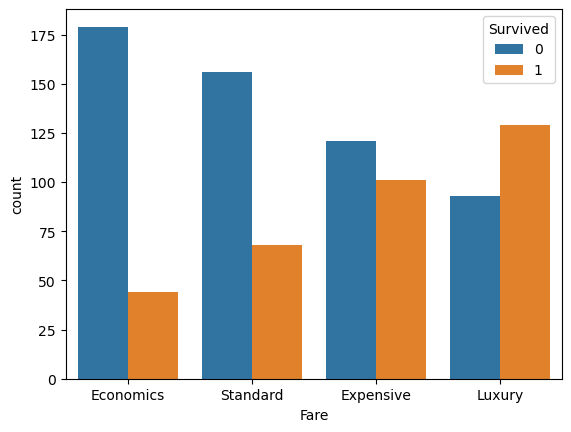

In [28]:
# To name fofr 0-25%, 25-50, 50-75, 75-100
fare_categories = ['Economics', 'Standard','Expensive', 'Luxury']
quartile_Data = pd.qcut(train_df['Fare'], 4, labels = fare_categories )

sns.countplot(x= quartile_Data, hue= train_df['Survived'])

- Distribution of fare:
     - Fare does not follow normal distribution and has a huge spike at the price range `(0-100)`
     - The distribution is skewed to the left with 75% of fare paid under `31 dollars` and a max fare paid is `512 dollars`
- Quartile plot:
     -  Passengers with `Luxury` and `Expensive` has a better chance of survival

### 4. Feature Engineering & Data Wrangling<a class="anchor" id="fe&dw"></a>

#### Name
-     Regular Expression

In [29]:
train_df['Name']

PassengerId
1                                Braund, Mr. Owen Harris
2      Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                 Heikkinen, Miss. Laina
4           Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                               Allen, Mr. William Henry
                             ...                        
887                                Montvila, Rev. Juozas
888                         Graham, Miss. Margaret Edith
889             Johnston, Miss. Catherine Helen "Carrie"
890                                Behr, Mr. Karl Howell
891                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [30]:
import re #regular expression 
# extract all the title behind ", " in order to find out if this needed to be put into train our model
def extract_title(name):
    p= re.compile(r", ([\w\s]+)\.")
    return p.search(name).groups(1)[0].strip()

train_df['title']= train_df['Name'].apply(lambda name: extract_title(name))
train_df['title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Major             2
Mlle              2
Don               1
Ms                1
Jonkheer          1
Capt              1
the Countess      1
Mme               1
Lady              1
Sir               1
Name: title, dtype: int64

In [31]:
test_df['title']= test_df['Name'].apply(lambda name: extract_title(name))
test_df['title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Dr          1
Ms          1
Dona        1
Name: title, dtype: int64

In [32]:
def group_title(title):
    if title in ['Mr', 'Miss','Mrs','Master']:
        return title
    if title == "Ms":
        return 'Miss'
    else:
        return "Others"
train_df['title'] = train_df['title'].apply(lambda title: group_title(title))
test_df['title'] = test_df['title'].apply(lambda title: group_title(title))

<AxesSubplot:xlabel='title', ylabel='count'>

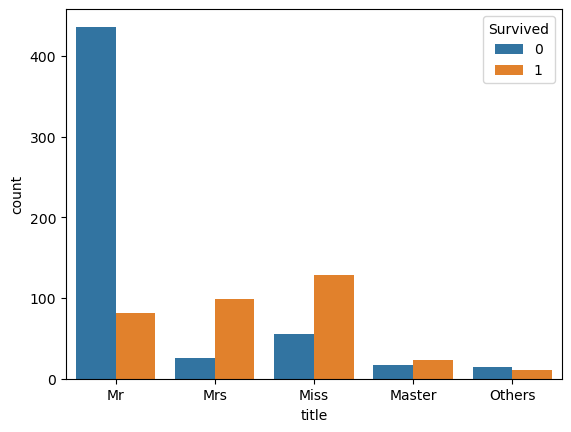

In [33]:
sns.countplot(data = train_df, x='title', hue='Survived')

## Family(merge Sibsp and Farch into Family)
-    `SibSp`, `Farch`

In [34]:
train_df['Family_size']= train_df['SibSp'].astype('int') + train_df['Parch'].astype('int')+1

In [35]:
test_df['Family_size']= test_df['SibSp'].astype('int') + test_df['Parch'].astype('int')+1

In [36]:
train_df['Family_cat']= pd.cut(train_df['Family_size'], bins= [0,1,4, 6,20], labels=['Solo', 'Small', 'Medium', 'Large']) #(0,1],(1,4], (4,6], (6,20]
test_df['Family_cat']= pd.cut(test_df['Family_size'], bins= [0,1,4, 6,20], labels=['Solo', 'Small', 'Medium', 'Large']) #(0,1],(1,4], (4,6], (6,20]

<AxesSubplot:xlabel='Family_cat', ylabel='count'>

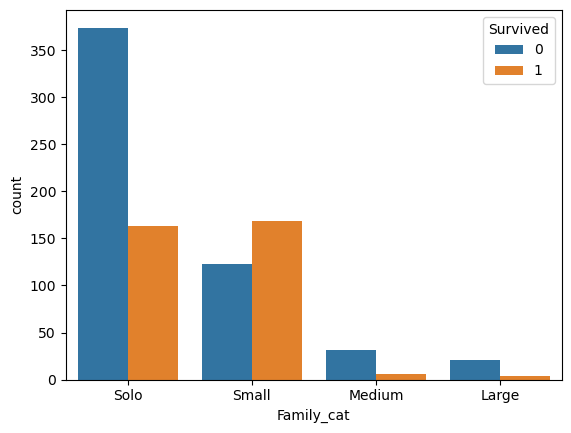

In [37]:
sns.countplot(data= train_df, x='Family_cat', hue='Survived')

### 4.2 Data wrangling

In [38]:
# All the features below will be used to train our model
num_features =['Age', 'Fare']
cat_features = ['Sex', 'Pclass','Embarked','title', 'Family_cat']

feature_cols = num_features + cat_features
print(feature_cols)

['Age', 'Fare', 'Sex', 'Pclass', 'Embarked', 'title', 'Family_cat']


In [39]:
def display_missing(df, feature_cols):
    for col in feature_cols:
        missing_count = df[col].isnull().sum()
        if missing_count>1:
            print(f"col {col} has {missing_count} missing values.")
            
display_missing(train_df,feature_cols)
display_missing(test_df,feature_cols)

col Age has 177 missing values.
col Embarked has 2 missing values.
col Age has 86 missing values.


### Filling missing value

#### Age
- Filling missing values with `median` of whole dataset

In [40]:
age_by_pclass = train_df.groupby(['Sex','Pclass']).median()['Age']

In [41]:
age_by_pclass

Sex     Pclass
female  1         35.0
        2         28.0
        3         21.5
male    1         40.0
        2         30.0
        3         25.0
Name: Age, dtype: float64

In [42]:
# Filling the missing value Age with the median of Sex and Pclass groups

train_df['Age']= train_df.groupby(['Sex','Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))
test_df['Age']= test_df.groupby(['Sex','Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))

In [43]:
display_missing(train_df,feature_cols)
display_missing(test_df,feature_cols)

col Embarked has 2 missing values.


In [44]:
x = train_df[feature_cols]
y = train_df['Survived']

In [45]:
x_test= test_df[feature_cols]

In [46]:
#preprocess pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

num_transformer = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline(steps =[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('scaler', OneHotEncoder(handle_unknown='ignore'))
])

In [47]:
preprocessor = ColumnTransformer(transformers = [ 
    ('num', num_transformer, num_features),
    ('cat', cat_transformer, cat_features),
])

In [48]:
preprocessor.fit(x)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Age', 'Fare']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('scaler',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Sex', 'Pclass', 'Embarked', 'title',
                                  'Family_cat'])])

In [49]:
x = preprocessor.transform(x) # X-> X_train, X_val

In [50]:
x_test = preprocessor.transform(x_test)

In [51]:
from sklearn.model_selection import train_test_split
#split 20% of data of X into validation because in test data we dont have "Survived" columns so we couldnt validate our date correctly, tuning our model
# 80% of the data will be used to train our model
x_train, x_val, y_train, y_val = train_test_split(x,y, test_size = 0.2)

## 5.Model training <a class="anchor" id="model-training"></a>

In [52]:
x_train.shape, x_val.shape

((712, 19), (179, 19))

In [53]:
x_test.shape

(418, 19)

In [54]:
# binary classification -> LogisticRegression work well with classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, classification_report, confusion_matrix
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeClassifier

In [55]:
#LogisticRegression
log_reg = LogisticRegression(solver ='liblinear', max_iter = 100)
log_reg.fit(x_train, y_train)

LogisticRegression(solver='liblinear')

In [56]:
log_reg.score(x_val, y_val)

0.8212290502793296

In [57]:
y_pred = log_reg.predict(x_val)

In [58]:
precision_score(y_val, y_pred), recall_score(y_val, y_pred)

(0.7647058823529411, 0.7647058823529411)

In [59]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86       111
           1       0.76      0.76      0.76        68

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



In [60]:
# Enhance the degree to see whether the logistic regression model is working better ( using PolynomialFeatures)
poly = PolynomialFeatures(degree=5)
poly_features_x_train = poly.fit_transform(x_train)
poly_features_x_val = poly.transform(x_val)

In [61]:
poly_log_reg = LogisticRegression(solver='liblinear', max_iter=100)
poly_log_reg.fit(poly_features_x_train, y_train)

C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LogisticRegression(solver='liblinear')

In [62]:
poly_log_reg.score(poly_features_x_val, y_val)

0.8268156424581006

`DecisionTreeClassifier model`

In [63]:
#Decision Tree
decision_tree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5, random_state=2022)
decision_tree.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=2022)

In [64]:
decision_tree.score(x_val, y_val)

0.7932960893854749

####  5.1 Cross-validatiton: try different fold to see which one will perform better

In [65]:
from sklearn.model_selection import cross_val_score

In [66]:
# LogisticRegression and Decision Tree
log_reg_cv = LogisticRegression(solver ='liblinear', max_iter = 1000)
dt_cv = DecisionTreeClassifier(criterion = 'entropy', max_depth = 8, random_state=2022)

lr_scores = cross_val_score(log_reg_cv, x, y, scoring='accuracy', cv=5)
dt_scores = cross_val_score(dt_cv, x, y, scoring='accuracy', cv=5)


In [67]:
lr_scores

array([0.83240223, 0.8258427 , 0.79775281, 0.81460674, 0.85955056])

In [68]:
dt_scores

array([0.7877095 , 0.81460674, 0.8258427 , 0.79213483, 0.81460674])

#### 5.2. Baseline momodel comparision

In [69]:
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier

seed= 2023
models = [
    LinearSVC(max_iter=12000, random_state=seed),
    SVC(random_state=seed),
    KNeighborsClassifier(metric= 'minkowski',p=2),
    LogisticRegression(solver ='liblinear', max_iter = 1000),
    DecisionTreeClassifier(random_state=seed),
    RandomForestClassifier(random_state= seed),
    ExtraTreesClassifier(),
    AdaBoostClassifier(),
]

In [70]:
from sklearn.model_selection import StratifiedKFold
def generate_baseline_results(models, x, y, metrics, cv=5, plot_results= False):
    #define k-fold:
    k_fold = StratifiedKFold(cv, shuffle= True, random_state=seed)
    entries=[]
    for model in models:
        model_name = model.__class__.__name__
        scores = cross_val_score(model, x, y, scoring='accuracy', cv =k_fold)
        for fold_idx, score in enumerate(scores):
            entries.append((model_name, fold_idx, score))
     
    cv_df = pd.DataFrame(entries, columns= ['model_name','fold_id','accuracy_score'])
    if plot_results:
        sns.boxplot(x='model_name',data =cv_df, y='accuracy_score',color = 'lightblue',showmeans=True)
        plt.title("Boxplot of Baseline model accuracy using 5-fold cross validation")
        plt.xticks(rotation=45)
        plt.show()
    #Summary result
    mean = cv_df.groupby('model_name')['accuracy_score'].mean()
    std = cv_df.groupby('model_name')['accuracy_score'].std()
    base_line_result = pd.concat([mean, std], axis=1, ignore_index= True)
    base_line_result.columns =['Mean', 'Standard deviation']
    #sort by accuracy
    base_line_result.sort_values(by=['Mean'], ascending=False, inplace = True)
    
    return base_line_result

generate_baseline_results(models, x, y, metrics='accuracy', cv=5, plot_results= False)

C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

,Mean,Standard deviation
model_name,,
SVC,0.836143,0.031097
LogisticRegression,0.827167,0.028974
LinearSVC,0.826044,0.037442
AdaBoostClassifier,0.818160,0.030812
RandomForestClassifier,0.812529,0.025614
KNeighborsClassifier,0.809177,0.015221
ExtraTreesClassifier,0.802442,0.021073
DecisionTreeClassifier,0.794608,0.016252


#### 5.3 Choose moodel SVC and test it on test data

In [72]:
from sklearn.model_selection import GridSearchCV

In [76]:
#SVC, I am choosing this model because it performs the best 
from sklearn.svm import LinearSVC, SVC
param_grid = {'C': [1, 10,0.1], 'gamma': [1,0.1, 0.01],'kernel': ['rbf']}
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(x_train,y_train)
print(grid.best_estimator_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ........................C=1, gamma=0.01,

In [77]:
grid_predictions = grid.predict(x_val)
print(confusion_matrix(y_val,grid_predictions))
print(classification_report(y_val,grid_predictions))
test_df['Survived'] = grid.predict(x_test)

[[96 15]
 [17 51]]
              precision    recall  f1-score   support

           0       0.85      0.86      0.86       111
           1       0.77      0.75      0.76        68

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



In [78]:
test_df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title,Family_size,Family_cat,Survived
PassengerId,,,,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr,1,Solo,0
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs,2,Small,1
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr,1,Solo,0
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr,1,Solo,0
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs,3,Small,1
